In [4]:
# %matplotlib nbagg
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
import time
sys.path.append("..")
os.chdir("/home/nakamura/HAI/main_server/hai")

import coloredlogs, logging
logger = logging.getLogger(__name__)
coloredlogs.install(level='CRITICAL', logger=logger)

import pymongo
from pymongo import MongoClient
from PIL import Image
from matplotlib import pylab as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation
import numpy as np
from bson.objectid import ObjectId
from sklearn.decomposition import PCA

mongo = MongoClient('localhost', 20202).hai

from flask import Flask
app = Flask(__name__)
app.config.from_pyfile(filename="application.cfg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [5]:
def display_latest_image():
    # only display latest image
    images = mongo.images.find({"cam_id": "webcam0"}, sort=[("_id", pymongo.DESCENDING)])
    im = images.next()
    display_image(im)

def display_image(im):
    print_time(im['time'])  
    plt.imshow(Image.open(app.config['RAW_IMG_DIR'] + im['filename']))
    
def print_time(t):
    print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)))
    
def display_image(im):
    print_time(im['time'])  
    plt.imshow(Image.open(app.config['RAW_IMG_DIR'] + im['filename']))

2017-12-02 13:35:29


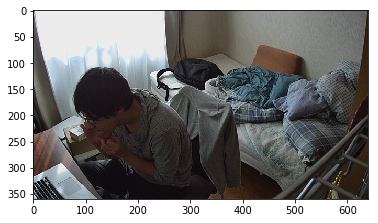

In [6]:
%matplotlib inline
display_latest_image()

In [97]:
hue_cols = mongo.hue.find(sort=[("_id", pymongo.DESCENDING)])
hue_col = hue_cols.next()
print_time(hue_col['time'])

2017-11-26 00:37:23


In [100]:
time.time()

1511625833.540344